# Ajani Mnyandu - P4

### Part 1: Bathymetry Plot

In [51]:
# Importing all the modules I'll need to analyse the data
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm # ChatGPT (2024)

In [52]:
# Load file and variables
bathymetry_image = nc.Dataset('../Data/gebco_2023_n2.7081_s-1.0602_w-50.5481_e-41.9458.nc')
x_range = bathymetry_image['lon'][:]
y_range = bathymetry_image['lat'][:]
elevation = bathymetry_image['elevation'][:]

In [53]:
# Define plot features
Xdim = 10
Ydim = 10
contour_levels = [-4000, -2000, -1000, -200, -100, -50, -20] 
colormap = 'terrain'
cbar_label = 'Elevation (m)' 
title = 'Amazon River Mouth Bathymetry Map'

C:\Users\LENOVO\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


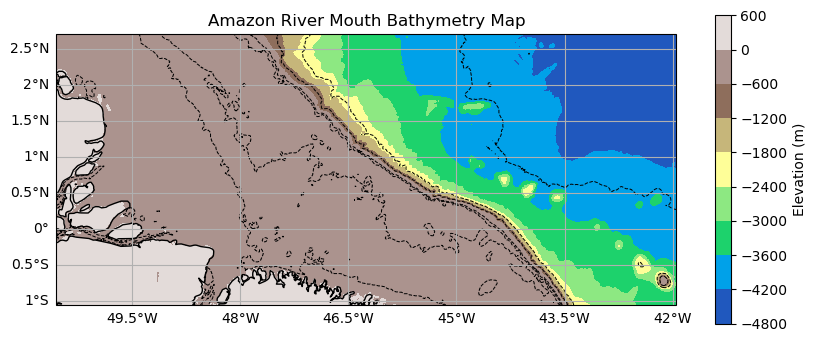

In [54]:
# Plot the data
fig, ax = plt.subplots(figsize=(Xdim, Ydim), subplot_kw=dict(projection=ccrs.PlateCarree()))
mesh = ax.contourf(x_range, y_range, elevation, cmap=colormap, shading='auto')
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.4)
cbar.set_label(cbar_label)

# Add map features
contour = ax.contour(x_range, y_range, elevation, levels=contour_levels, colors='black', linewidths=0.7)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.coastlines(resolution='10m')
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False

# Add title and save figure
plt.title(title)
outfile = '../Figures/Amazon_Mouth_Bathymetry_Map.png'
plt.savefig(outfile, facecolor='white', transparent=False)
plt.show()


### Part 2: Mean Chlorophyll Plot

Because the code takes really long to load the chlorophyll data, I have extracted the chlorophyll data for the region of interest to make it run faster.

In [55]:
# Read netCDF file and assign variable names

chlorophyll_data = nc.Dataset('../Data/ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc')

# Read variable for the chlorophyll data

lon = chlorophyll_data['lon'][:]
lat = chlorophyll_data['lat'][:]
chlorophyll = chlorophyll_data['chlor_a'][:]

In [69]:
# Define bounding box for the Amazon region
amazon_lon_min = -50.5481
amazon_lon_max =-41.9458
amazon_lat_min =-1.0602
amazon_lat_max =2.7081

# Find the indices corresponding to the bounding box
amazon_lat_indices = np.where((lat >= amazon_lat_min) & (lat <= amazon_lat_max))[0]
amazon_lon_indices = np.where((lon >= amazon_lon_min) & (lon <= amazon_lon_max))[0]

# Define new amazon longitude and latitude grid

amazon_lon = lon[amazon_lon_indices]
amazon_lat = lat[amazon_lat_indices]

# Extract chlorophyll data for the Amazon region
chlorophyll_amazon = chlorophyll[:, amazon_lat_indices, :][:, :, amazon_lon_indices]

# Average the chlorophyll data over time
chloro_mean_amazon = np.mean(chlorophyll_amazon, axis =0)

In [86]:
# Define plot features

Xdim = 10
Ydim = 10
cmin = 0.2
cmax = 100
c_int = 1
colormap = 'Greens'
title = 'Mean Chlorophyll (mg Chl/m$^3$) around the Amazon Mouth'
extents = [amazon_lon_min, amazon_lon_max, amazon_lat_min, amazon_lat_max]

C:\Users\LENOVO\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


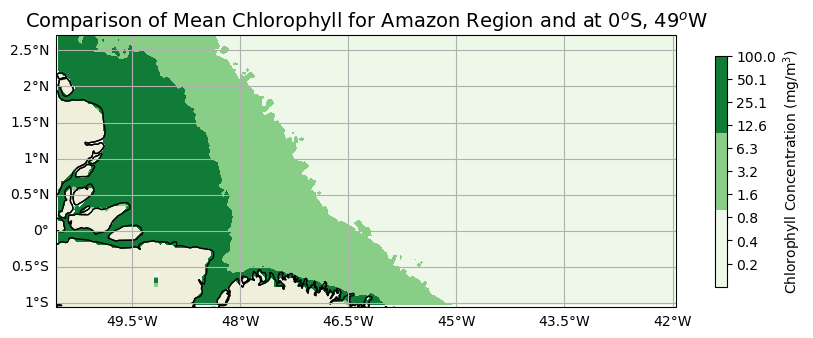

In [95]:
# Plot the data
fig, ax = plt.subplots(figsize=(Xdim, Ydim), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent(extents)
mesh = ax.contourf(amazon_lon, amazon_lat,chloro_mean_amazon, 
                   cmap=colormap, shading='interp', norm=LogNorm(vmin=cmin, vmax=cmax),transform=ccrs.PlateCarree())


# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.coastlines(resolution='10m')
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Chlorophyll Concentration (mg/m$^3$)')
# Set colorbar ticks and format tick labels
ticks = np.logspace(np.log10(cmin), np.log10(cmax), 10)  
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.1f}' for tick in ticks])

# Add title
plt.title(title, fontsize=14)
outfile = '../Figures/Mean_Chlorophyll.png'
plt.savefig(outfile, facecolor='white', transparent=False)
plt.show()

### Part 3: Seasonal Means - Chlorophyll

In [59]:
# Create the monthly means
monthly_means = []
for i in range(12):
    month_data = chlorophyll_amazon[i::12, :, :] # creates the data for each month
    month_mean = np.mean(month_data, axis=0) # find the mean for each month
    monthly_means.append(month_mean) # fill the monthly means list with the month mean

In [60]:
# Plot the data
Xdim = 10
Ydim = 10
colormap = 'jet'
cmin = 0.2
cmax = 100
c_int = 1
title = 'Seasonal Variation of Chlorophyll (mg Chl/ m$^3$) around the Amazon Mouth'
extents = [amazon_lon_min, amazon_lon_max, amazon_lat_min, amazon_lat_max]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']

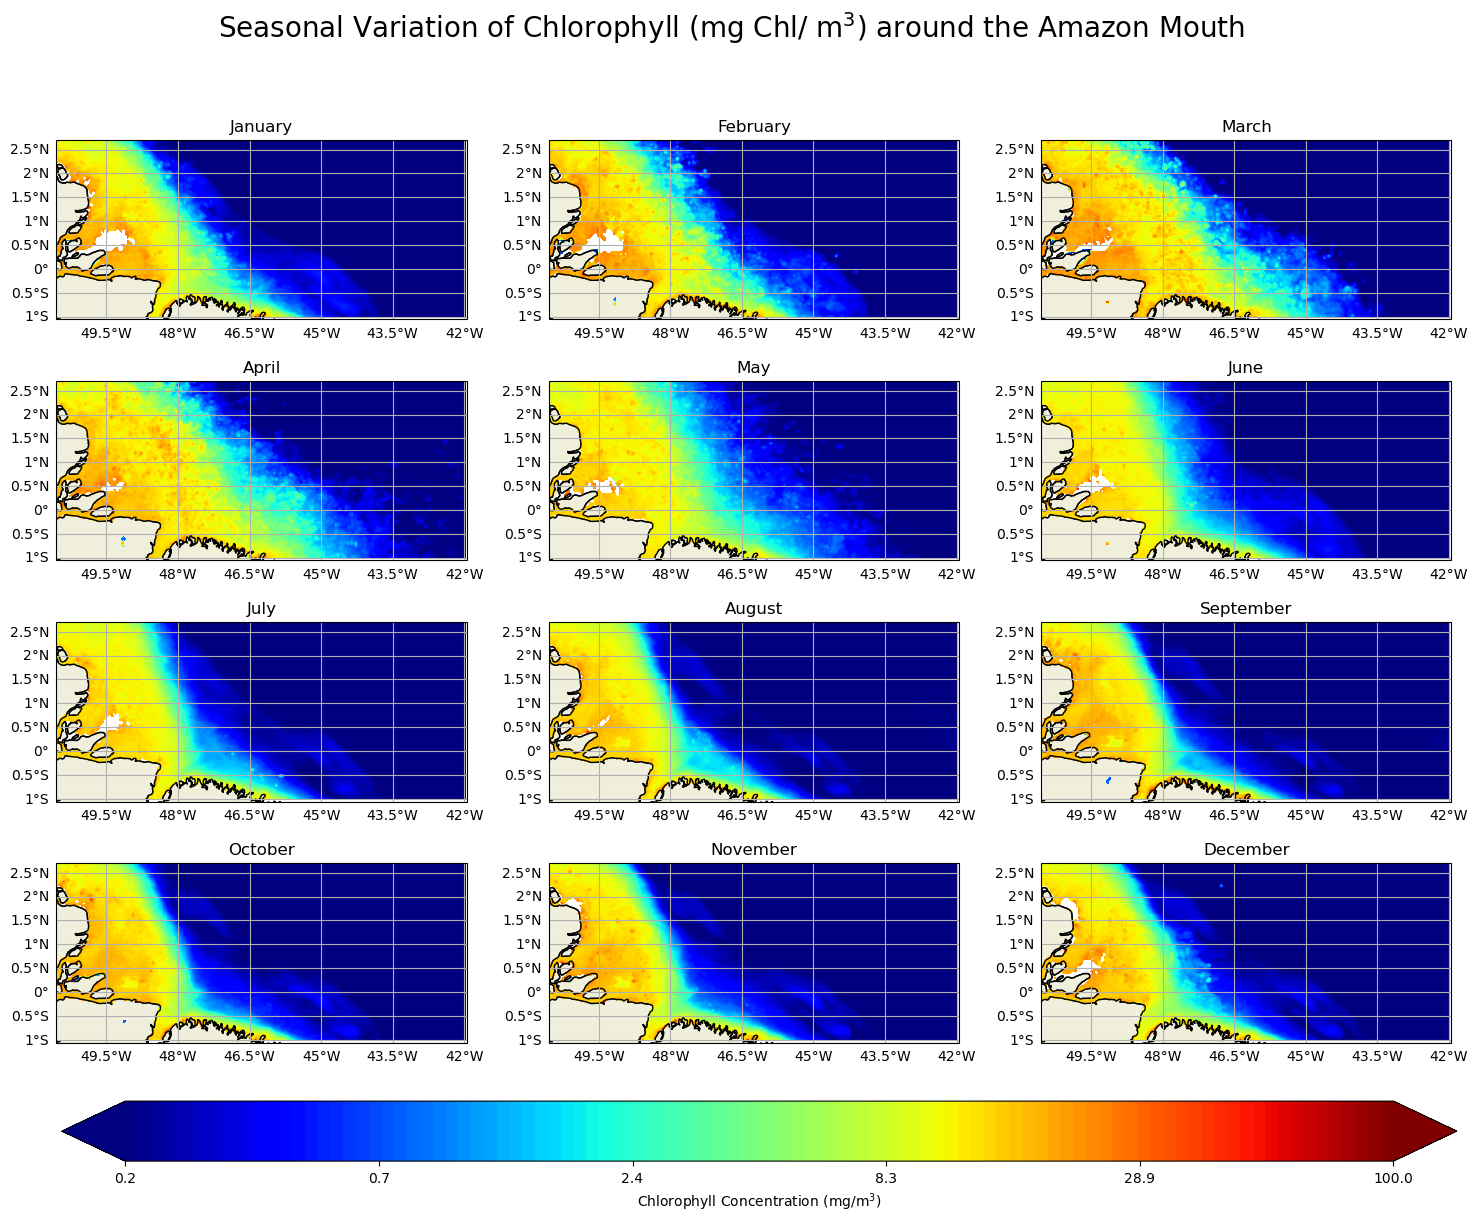

In [61]:
# Create a figure with 4x3 subplots (12 months)
fig, axs = plt.subplots(4, 3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i in range(12):
    mesh = axs[i].contourf(amazon_lon, amazon_lat, monthly_means[i], 
                           cmap=colormap, levels=np.logspace(np.log10(cmin), np.log10(cmax), 100), 
                           norm=LogNorm(vmin=cmin, vmax=cmax), extend='both', transform=ccrs.PlateCarree())
    
    # Add map features and gridlines
    axs[i].add_feature(cfeature.LAND, edgecolor='black')
    axs[i].add_feature(cfeature.COASTLINE)
    axs[i].add_feature(cfeature.BORDERS, linestyle=':')
    gl = axs[i].gridlines(draw_labels=True)  
    gl.right_labels = False  
    gl.top_labels = False  #
    axs[i].set_extent(extents, crs=ccrs.PlateCarree())
    
    # Set titles
    axs[i].set_title(f'{months[i]}')

# Draw the colorbar
axc = fig.add_axes([.128, .02, .775, .05])
cbar = fig.colorbar(mesh, cax=axc, orientation='horizontal')
cbar.set_label('Chlorophyll Concentration (mg/m$^3$)', )

# Set colorbar ticks and format tick labels
ticks = np.logspace(np.log10(cmin), np.log10(cmax), 6)  
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.1f}' for tick in ticks]) 

plt.suptitle(title, fontsize=20)
outfile = '../Figures/Seasonal_Chlorophyll.png'
plt.savefig(outfile, facecolor='white', transparent=False)
plt.show()


### Part 4: Time Series

In [65]:
lon_point = -49.0
lat_point = 0.0

# Compute the mean chlorophyll concentration for the Amazon region
mean_chlorophyll_amazon = np.mean(chlorophyll_amazon, axis=(1, 2))

# Find the indices corresponding to the single grid point at lat 0 and lon -49 to 
single_lat_index = np.abs(lat - lat_point).argmin()
single_lon_index = np.abs(lon - (lon_point)).argmin()
chlorophyll_single_point = chlorophyll[:, single_lat_index, single_lon_index]

In [93]:
# Define plot features
Xdim = 10
Ydim = 6
label1 = 'Mean Chlorophyll (Amazon Region)'
label2 = 'Chlorophyll (at 0$^{o}$S, 49$^{o}$W)'
xlabel = 'Time (months)'
ylabel = 'Chlorophyll Concentration (mg Chl/m$^3$)'
title = 'Comparison of Mean Chlorophyll for Amazon Region and at 0$^{o}$S, 49$^{o}$W'
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

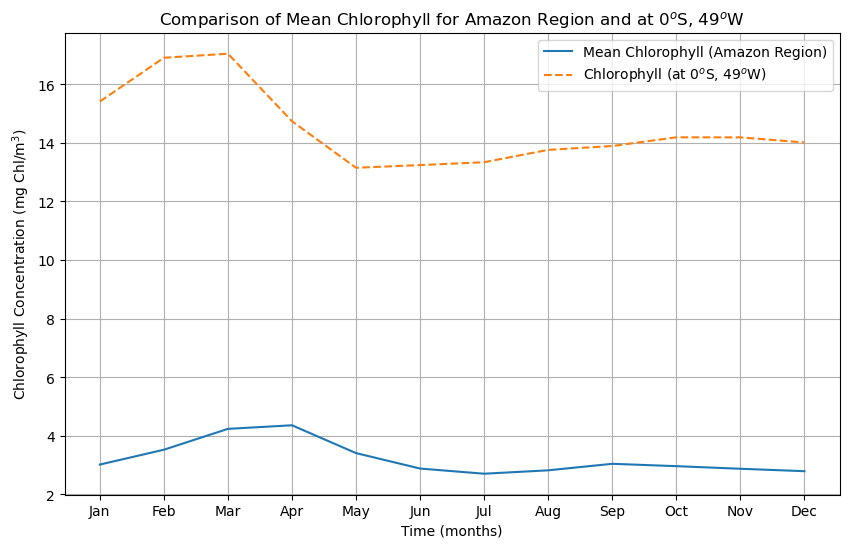

In [94]:
# Plotting the mean chlorophyll concentration for the Amazon region and the single grid point
plt.figure(figsize=(Xdim, Ydim))
plt.plot(mean_chlorophyll_amazon, label=label1)
plt.plot(chlorophyll_single_point, label=label2, linestyle='--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.xticks(range(len(months)), months)  # Set x-axis ticks to month names
plt.legend()
plt.grid(True)
outfile = '../Figures/Timeseries_Chlorophyll.png'
plt.savefig(outfile, facecolor='white', transparent=False)
plt.show()